
# Investigate a Dataset (TMDb movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset comes from IMDB and contains information about 10,000 movies,
short films and tv series collected from The Movie Database (TMDb), including user
ratings, revenue, runtime and budget.

### In this project, i'll be answering the following questions:

Which movie had the highest and lowest revenue?

What is the relationship between budget and revenue?

What genres have been associated with movies that have high revenues?




In [1]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as pllt
import seaborn as sns
from pandas import DataFrame
df = pd.DataFrame({})

<a id='wrangling'></a>
## Data Wrangling


### Explore General Properties of the Dataset


In [2]:
# Reading a csv file and storing the dataset in pandas dataframe variable tmdb_data
df= pd.read_csv('tmdb-movies.csv')
# Printing the first five rows of the dataset
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Check th sum of the columns
df.shape

(10866, 21)

In [4]:
# Check some statistics of the data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [5]:
# Let us check infomation on datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###  Data Cleaning 

Frist: Remove columns that are not useful for answering questions (Id, Vote_avrege, Release_year, budget_adj, Revwnue_adj, imbd_id, Cast, Director, overview, production_companies, release_date, Homepage, Tagline, Keywords)

In [6]:
df.drop(['id', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date', 'keywords'], axis=1, inplace=True)

In [7]:
df.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres  vote_count  
0  Action|Adventure|Science Fiction|Thriller        5562  
1  Action|Adventure|Science Fiction|Thriller        6185  
2         Adventure|Science Fiction|Thriller        2480  
3   Action|Adventure|Science Fiction|Fantasy        5292  
4                      Action|Crime|Thriller        2947

In [8]:
df.describe()

popularity        budget       revenue       runtime    vote_count
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000

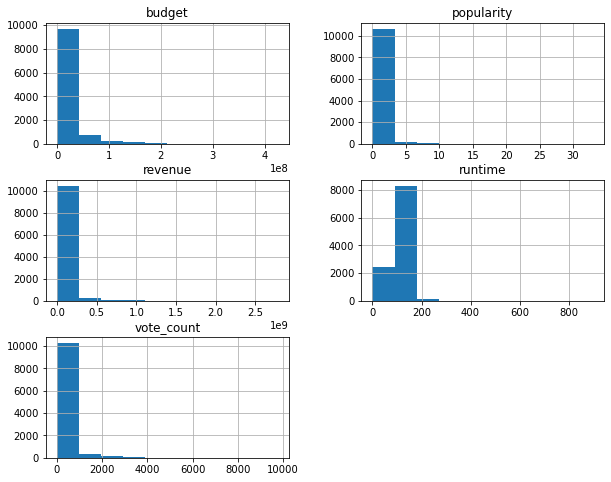

In [9]:
df.hist(figsize=(10, 8));

Second, fill the missing data and delete the one duplicated row that we have in our dataset.

In [10]:
# check infomation on datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 594.4+ KB


In [11]:
# Fill the missing data in Genres columns
df.genres.fillna('', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10866 non-null  object 
 6   vote_count      10866 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 594.4+ KB


In [12]:
# check for duplicates in the data
sum(df.duplicated())

1

In [13]:
# Remove the duplicated rows
df.drop_duplicates(inplace=True)

Third, revenue and budget contain values of 0, I will ill these in with the average.

In [14]:
# Get average of budget_adj
print(df['revenue'].mean())

39826896.07685228


In [15]:
# Replace 0 values with mean
df['revenue'] = df['revenue'].replace(0, 39826896.07685228)

In [16]:
# Get average of budget_adj
print(df['budget'].mean())

14624286.06433502


In [17]:
# Replace 0 values with mean
df['budget'] = df['budget'].replace(0, 14624286.06433502)

In [18]:
# check the values
df.describe()

popularity        budget       revenue       runtime    vote_count
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000
mean       0.646446  2.229110e+07  6.187923e+07    102.071790    217.399632
std        1.000231  2.801385e+07  1.110236e+08     31.382701    575.644627
min        0.000065  1.000000e+00  2.000000e+00      0.000000     10.000000
25%        0.207575  1.462429e+07  3.982690e+07     90.000000     17.000000
50%        0.383831  1.462429e+07  3.982690e+07     99.000000     38.000000
75%        0.713857  1.500000e+07  3.982690e+07    111.000000    146.000000
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000

In [19]:
df['revenue'].describe()

count    1.086500e+04
mean     6.187923e+07
std      1.110236e+08
min      2.000000e+00
25%      3.982690e+07
50%      3.982690e+07
75%      3.982690e+07
max      2.781506e+09
Name: revenue, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which movie had the highest and lowest revenue?


In [20]:
# Movie with highest revenue
df.loc[df['revenue'].idxmax()]

popularity                                         9.43277
budget                                            2.37e+08
revenue                                        2.78151e+09
original_title                                      Avatar
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
vote_count                                            8458
Name: 1386, dtype: object

In [21]:
# Movie with lowest revenue
df.loc[df['revenue'].idxmin()]

popularity               0.462609
budget                      6e+06
revenue                         2
original_title    Shattered Glass
runtime                        94
genres              Drama|History
vote_count                     46
Name: 5067, dtype: object

We can see that the highest revenue is Avatar with 2.78151e+09 dollars and the lowest is Shattered Glass 2 dollars.

### Question 2: What is the relationship between budget and revenue ?

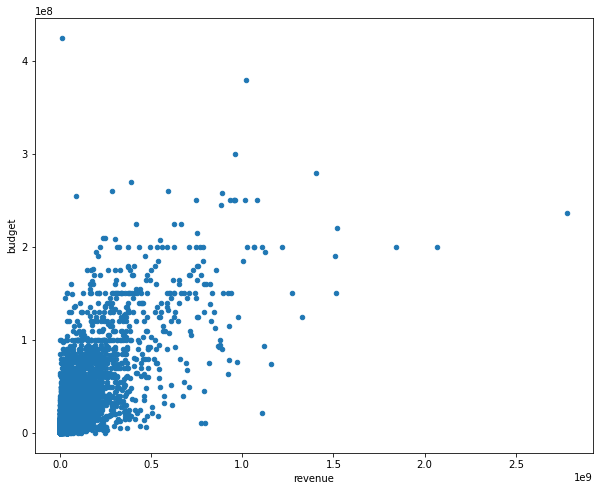

In [22]:
# Plot scatter plot of these two columns
df.plot(x='revenue', y='budget', kind='scatter', figsize=(10, 8))


From this scatter plot, we can see movies with a high budget get high revenue.

### Question 2: What genres have been associated with movies that have high revenues?


In [23]:
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
                     23
dtype: int64

Text(0, 0.5, 'Revenue')

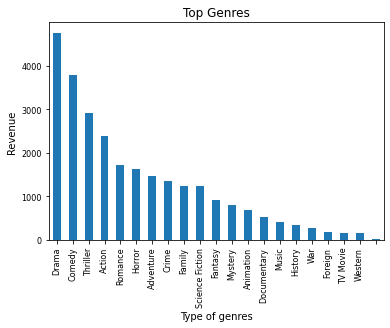

In [25]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Revenue')

We can see that most movies has drame as a genre which tends to higher revenue.


# <a id='conclusions'></a>
## Conclusions

### 1- There is correlation between a movie's budget and it's revenue. A movie having high budget seems to have a high revenue.
### 2- The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy


### Limitations:  This analysis was done considering the movies which had a significant amount of revenue. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis